In [1]:
######################
# import pacakge
######################
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
#get_ipython().run_line_magic('matplotlib', 'ipympl')
#%matplotlib widget
import os
import FEA_analysis
from datetime import timedelta


# FEA vacuum conditioning run (240827_4FEA_vac)

In [ ]:
##########################
#importing folder folder
##########################

cols = ['timestamp','ch', 'VMON','IMON']
FEA_test = '240827_4FEA_vac' 


all_df_caen1, all_df_caen2 = FEA_analysis.import_caen_data(FEA_test, cols)

#windows
#caenlogfolder = 'd:\\data\\kamioka-data\\CAEN_logs\\'

In [16]:
all_df_caen1

[                 timestamp  ch  VMON     IMON  caen
 0        24/08/28-11:34:25   0  1.95  0.00401     1
 4        24/08/28-11:34:28   0  2.00  0.00401     1
 8        24/08/28-11:34:30   0  2.00  0.00401     1
 12       24/08/28-11:34:33   0  2.00  0.00402     1
 16       24/08/28-11:34:35   0  2.00  0.00402     1
 ...                    ...  ..   ...      ...   ...
 1423768  24/09/10-14:17:58   0  1.90  0.00402     1
 1423772  24/09/10-14:18:00   0  1.90  0.00402     1
 1423776  24/09/10-14:18:03   0  1.90  0.00402     1
 1423780  24/09/10-14:18:06   0  1.90  0.00402     1
 1423784  24/09/10-14:18:08   0  1.90  0.00402     1
 
 [355947 rows x 5 columns],
                  timestamp  ch  VMON     IMON  caen
 1        24/08/28-11:34:25   1  1.55  0.00313     1
 5        24/08/28-11:34:28   1  1.55  0.00313     1
 9        24/08/28-11:34:30   1  1.55  0.00314     1
 13       24/08/28-11:34:33   1  1.55  0.00314     1
 17       24/08/28-11:34:35   1  1.55  0.00314     1
 ...            

now we have the caen files separated by channel

In [20]:
from FEA_analysis import total_charge

t_start = '24/08/28-14:40:01'
t_end = '24/08/28-15:50:00'

t_start2 = '24/09/24-17:40:01'
t_end2 = '24/09/24-17:50:02'

today = datetime.today()

result_caen1 = [total_charge(all_df_caen1[0], t_start, t_end), total_charge(all_df_caen1[1], t_start, t_end), total_charge(all_df_caen1[2], t_start, t_end), total_charge(all_df_caen1[3], t_start, t_end)]
result_caen2 = [total_charge(all_df_caen2[0], t_start, t_end), total_charge(all_df_caen2[1], t_start, t_end), total_charge(all_df_caen2[2], t_start, t_end), total_charge(all_df_caen2[3], t_start, t_end)]


charge_1 = [result_caen1[i][0] for i in range(0, len(all_df_caen1))]
charge_2 = [result_caen2[i][0] for i in range(0, len(all_df_caen2))]

charge = {'int_C1HV0':charge_1[0], 'int_C1HV1':charge_1[1], 'int_C1HV2':charge_1[2], 'int_C1HV3':charge_1[3], 'int_C2HV0':charge_2[0], 'int_C2HV1':charge_2[1], 'int_C2HV2':charge_2[2], 'int_C2HV3':charge_2[3]}

mean_current_1 = [result_caen1[i][1] for i in range(0, len(all_df_caen1))]
mean_current_2 = [result_caen2[i][1] for i in range(0, len(all_df_caen2))]

corr_all_caen1 = [result_caen1[i][2] for i in range(0, len(all_df_caen1))]
corr_all_caen2 = [result_caen2[i][2] for i in range(0, len(all_df_caen2))]


print(f'\ncharge of caen1 HV0 is {charge_1[0]} uC'
      f'\ncharge of caen1 HV1 is {charge_1[1]} uC'
      f'\ncharge of caen1 HV2 is {charge_1[2]} uC'
      f'\ncharge of caen1 HV3 is {charge_1[3]} uC\n'
      f'\ncharge of caen2 HV0 is {charge_2[0]} uC'
      f'\ncharge of caen2 HV1 is {charge_2[1]} uC'
      f'\ncharge of caen2 HV2 is {charge_2[2]} uC'
      f'\ncharge of caen2 HV3 is {charge_2[3]} uC\n'

      f'last updated {today}\n')

current used to baseline correction is 0.004026368068251066
current used to baseline correction is 0.0031339061547836686
current used to baseline correction is -0.004874960390006094
current used to baseline correction is 0.012808592321755026
current used to baseline correction is 0.0006393658536585366
current used to baseline correction is 0.00399180487804878
current used to baseline correction is -0.0024626524390243903
current used to baseline correction is 0.005017756097560976

charge of caen1 HV0 is 11.03870315661998 uC
charge of caen1 HV1 is -13.292520341250992 uC
charge of caen1 HV2 is 37013.92267853416 uC
charge of caen1 HV3 is 45827.92323550097 uC

charge of caen2 HV0 is -7.736841463423995 uC
charge of caen2 HV1 is -6.609871219512908 uC
charge of caen2 HV2 is 31207.640371881487 uC
charge of caen2 HV3 is 47107.85411941883 uC
last updated 2024-11-22 14:34:25.879801



In [41]:
t_start = '24/08/28-14:40:01'
t_end = '24/08/28-15:50:00'

t_start_b = '24/09/06-20:40:01'
t_end_b = '24/09/07-14:50:00'

new_df = FEA_analysis.partial_charge(all_df_caen2[3], t_start_b, t_end_b, t_start, t_end)



['24/09/06-20:40:03', '24/09/06-20:40:05', '24/09/06-20:40:08', '24/09/06-20:40:11', '24/09/06-20:40:13', '24/09/06-20:40:16', '24/09/06-20:40:18', '24/09/06-20:40:21', '24/09/06-20:40:23', '24/09/06-20:40:26', '24/09/06-20:40:28', '24/09/06-20:40:31', '24/09/06-20:40:34', '24/09/06-20:40:36', '24/09/06-20:40:39', '24/09/06-20:40:41', '24/09/06-20:40:44', '24/09/06-20:40:46', '24/09/06-20:40:49', '24/09/06-20:40:51', '24/09/06-20:40:54', '24/09/06-20:40:57', '24/09/06-20:40:59', '24/09/06-20:41:02', '24/09/06-20:41:04', '24/09/06-20:41:07', '24/09/06-20:41:09', '24/09/06-20:41:12', '24/09/06-20:41:14', '24/09/06-20:41:17', '24/09/06-20:41:20', '24/09/06-20:41:22', '24/09/06-20:41:25', '24/09/06-20:41:27', '24/09/06-20:41:30', '24/09/06-20:41:32', '24/09/06-20:41:35', '24/09/06-20:41:38', '24/09/06-20:41:40', '24/09/06-20:41:43', '24/09/06-20:41:45', '24/09/06-20:41:48', '24/09/06-20:41:50', '24/09/06-20:41:53', '24/09/06-20:41:55', '24/09/06-20:41:58', '24/09/06-20:42:01', '24/09/06-20

In [42]:
new_df.columns

Index(['timestamp', 'IMON', 'VMON', 'caen', 'ch'], dtype='object')

## plots

### plot of entire experiment period

NameError: name 'new_df' is not defined

<Figure size 1280x960 with 0 Axes>

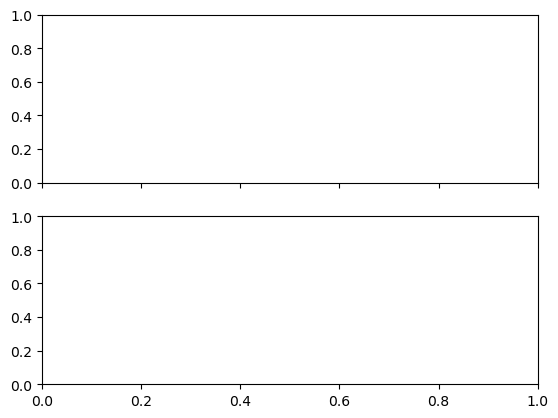

In [66]:
plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
date_caen2= []

df = new_df

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

for date in df.timestamp.tolist():    
    date_caen2.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot_date(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot_date(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)

fig.suptitle("Current/voltage reading of FEA0008")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

### now a plot filtering the datetime

In [ ]:
d1 = datetime(2024, 3, 11, 00, 43, 14)
d2 = datetime(2024, 3, 13, 12, 40, 29)
df_f = filter_date(df,d1,d2)

df_0 = df_f.query("channel==2")
df_2 = df_f.query("channel==3")

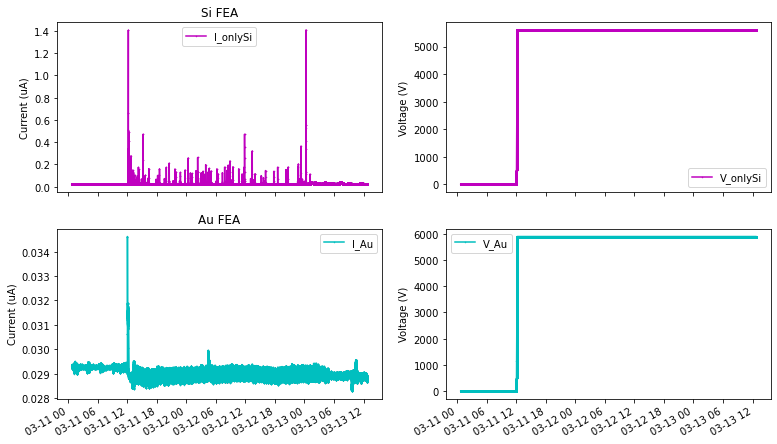

In [ ]:
#plt.subplots(2,1, sharex='col')

plt.figure(figsize = [11,7])

plt.subplot(2,2,1)
plt.title("Si FEA")
plt.ylabel('Current (uA)')
plt.plot_date(df_0.date[0:], df_0.IMon[0:] - np.min(df.IMon[0:]),'.-', color='m',label="I_"+FEA1, markersize=1)
plt.legend()

plt.subplot(2,2,3)
plt.title("Au FEA")
plt.ylabel('Current (uA)')
plt.plot_date(df_2.date[0:], df_2.IMon[0:] - np.min(df.IMon[0:]),'.-',color='c',label='I_'+FEA2, markersize=1)
plt.legend()

plt.subplot(2,2,2)
plt.ylabel('Voltage (V)')
plt.plot_date(df_0.date[0:], df_0.VMon[0:],'.-',color='m',label='V_'+FEA1, markersize=1)
plt.legend()

plt.subplot(2,2,4)
plt.ylabel('Voltage (V)')
plt.plot_date(df_2.date[0:], df_2.VMon[0:],'.-',color='c',label='V_'+FEA2, markersize=1)
plt.legend()

#plt.legend()
plt.tight_layout()
plt.gcf().autofmt_xdate()

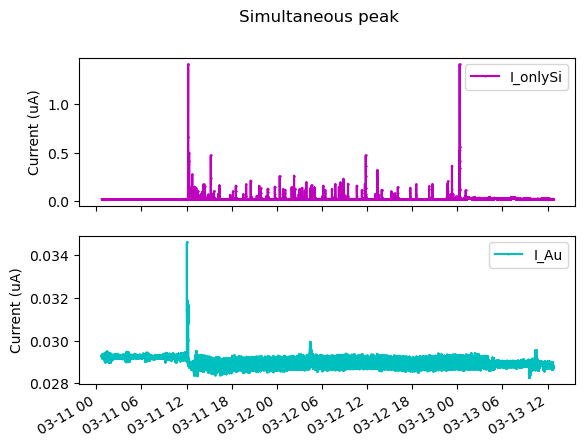

In [ ]:
fig, (ax3, ax4) = plt.subplots(2,1, sharex='col')

ax3.plot_date(df_0.date[0:], df_0.IMon[0:] - np.min(df.IMon[0:]),'.-', color='m',label="I_"+FEA1, markersize=1)
ax4.plot_date(df_2.date[0:], df_2.IMon[0:] - np.min(df.IMon[0:]),'.-',color='c',label='I_'+FEA2, markersize=1)

fig.suptitle("Simultaneous peak")
#ax3.set_title("Subplot title")
ax3.set_ylabel('Current (uA)')
ax4.set_ylabel('Current (uA)')
#ax3.set_yscale('log')
#ax4.set_yscale('log')
#ax3.set_ylim(1e-3, 1e-1)
#ax4.set_ylim(1e-4, 1e-1)
ax3.legend()
ax4.legend()

plt.gcf().autofmt_xdate()

# face-to-face FEA data

In [ ]:
fcaen1 = caenlogfolder + 'CAENGECO2020-240424-240513.log'
fcaen2 = caenlogfolder + 'CAENGECO2020-240424.log'
fcaen3 = caenlogfolder + 'CAENGECO2020_until240613_end.log'
fcaen4 = caenlogfolder + 'CAENGECO2020_240501_240516.log'

FEA1='FEA-0036(Si)'
FEA2='FEA-0038(Au)'

In [ ]:
# this step takes time, be patient
df1 = get_HV_df([fcaen1])
df2 = get_HV_df([fcaen2])
df3 = get_HV_df([fcaen3])
df4 = get_HV_df([fcaen4])

num_CAENfolder = 4

#print(df1.iloc[1:,])
# print(df1.sort_values(by="date").tail())
# print(df2.sort_values(by="date").tail())
# print(df3.sort_values(by="date").tail())

df_unsorted = pd.concat([df1.iloc[:-2,], df2.iloc[:-2,], df3.iloc[:-2,], df4.iloc[:-2,]])

df = df_unsorted.sort_values(by='date').iloc[:-num_CAENfolder*2,]

print(df.iloc[:-num_CAENfolder*2,].tail())
print(df.head())

df1 = df.query("channel==2")
df2 = df.query("channel==3")

The number of empty line in /home/caio/data/kamioka-data/FEA_test_0036-0038_2404-/CAEN_data/CAENGECO2020-240424-240513.log is 0
The number of empty line in /home/caio/data/kamioka-data/FEA_test_0036-0038_2404-/CAEN_data/CAENGECO2020-240424.log is 0
The number of empty line in /home/caio/data/kamioka-data/FEA_test_0036-0038_2404-/CAEN_data/CAENGECO2020_until240613_end.log is 1658
The number of empty line in /home/caio/data/kamioka-data/FEA_test_0036-0038_2404-/CAEN_data/CAENGECO2020_240501_240516.log is 0
                       date  channel     IMon  VMon  Pw  ChStatus  IMonRange
3255085 2024-06-13 11:14:55        2 -0.00304   1.6   0       0.0          0
3255086 2024-06-13 11:14:56        2 -0.00303   1.6   0       0.0          0
6510191 2024-06-13 11:14:56        3  0.01158   1.8   0       0.0          0
6510192 2024-06-13 11:14:58        3  0.01158   1.8   0       0.0          0
3255088 2024-06-13 11:14:58        2 -0.00302   1.6   0       0.0          0
                       date 

## plots

### plots of entire experiment period

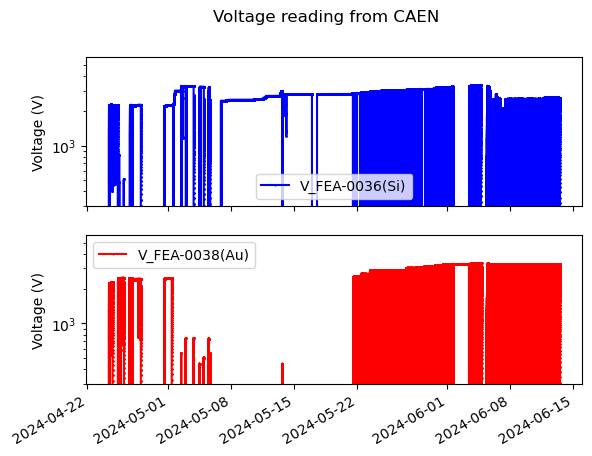

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

ax1.plot_date(df1.date[0:], df1.VMon[0:],'.-',color='blue',  label='V_'+FEA1, markersize=1)
ax2.plot_date(df2.date[0:], df2.VMon[0:],'.-',color='red', label='V_'+FEA2, markersize=1)

fig.suptitle("Voltage reading from CAEN")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('Voltage (V)')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_ylim(300)
ax2.set_ylim(300)
ax1.legend(loc='best')
ax2.legend(loc='best')

plt.gcf().autofmt_xdate()

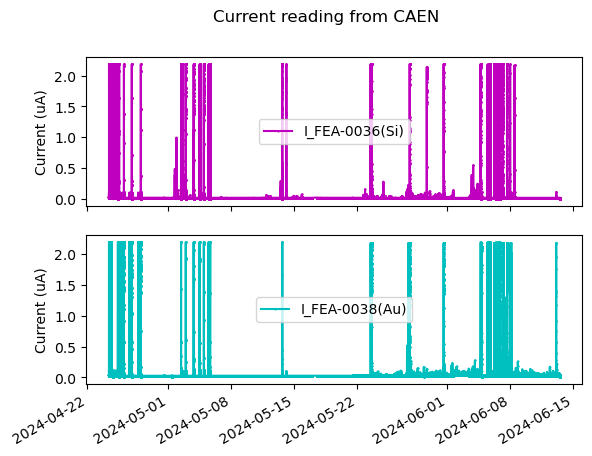

In [ ]:
fig, (ax3, ax4) = plt.subplots(2,1, sharex='col')

ax3.plot_date(df1.date[0:], df1.IMon[0:] - np.min(df.IMon[0:]),'.-', color='m',label="I_"+FEA1, markersize=1)
ax4.plot_date(df2.date[0:], df2.IMon[0:] - np.min(df.IMon[0:]),'.-',color='c',label='I_'+FEA2, markersize=1)

fig.suptitle("Current reading from CAEN")
#ax3.set_title("Subplot title")
ax3.set_ylabel('Current (uA)')
ax4.set_ylabel('Current (uA)')
#ax3.set_yscale('log')
#ax4.set_yscale('log')
#ax3.set_ylim(1e-3, 1e-1)
#ax4.set_ylim(1e-4, 1e-1)
ax3.legend(loc='best')
ax4.legend(loc='best')

plt.gcf().autofmt_xdate()

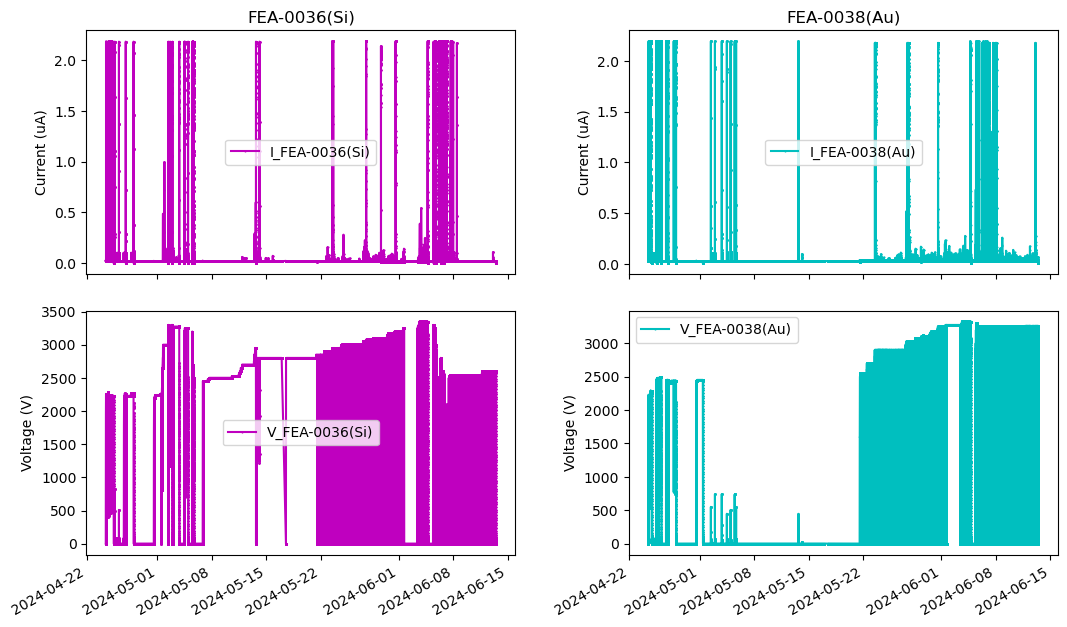

In [ ]:
plt.figure(figsize = [11,7])

plt.subplot(2,2,1)
plt.title(f"{FEA1}")
plt.ylabel('Current (uA)')
plt.plot_date(df1.date[0:], df1.IMon[0:] - np.min(df.IMon[0:]),'.-', color='m',label="I_"+FEA1, markersize=1)
plt.legend(loc='best')

plt.subplot(2,2,2)
plt.title(f"{FEA2}")
plt.ylabel('Current (uA)')
plt.plot_date(df2.date[0:], df2.IMon[0:] - np.min(df.IMon[0:]),'.-',color='c',label='I_'+FEA2, markersize=1)
plt.legend(loc='best')

plt.subplot(2,2,3)
plt.ylabel('Voltage (V)')
#plt.yscale("log")
plt.plot_date(df1.date[0:], df1.VMon[0:],'.-',color='m',label='V_'+FEA1, markersize=1)
plt.legend(loc='best')

plt.subplot(2,2,4)
plt.ylabel('Voltage (V)')
plt.plot_date(df2.date[0:], df2.VMon[0:],'.-',color='c',label='V_'+FEA2, markersize=1)
#plt.yscale("log")
plt.legend(loc='best')

#plt.legend()
plt.tight_layout()
plt.gcf().autofmt_xdate()

directory = '/home/caio/remote/graphs/FEA_0036-0038'
filename = 'after_new-HV_all'
path = os.path.join(directory, filename)

plt.savefig(path, dpi=200, transparent = True)

plt.show()

### now plot filtering data

In [ ]:
d1 = datetime(2024, 6, 6, 0, 00, 0)
d2 = datetime(2024, 6, 6, 0, 1, 0)
df_f = filter_date(df,d1,d2)

df_0 = df_f.query("channel==2")
df_2 = df_f.query("channel==3")

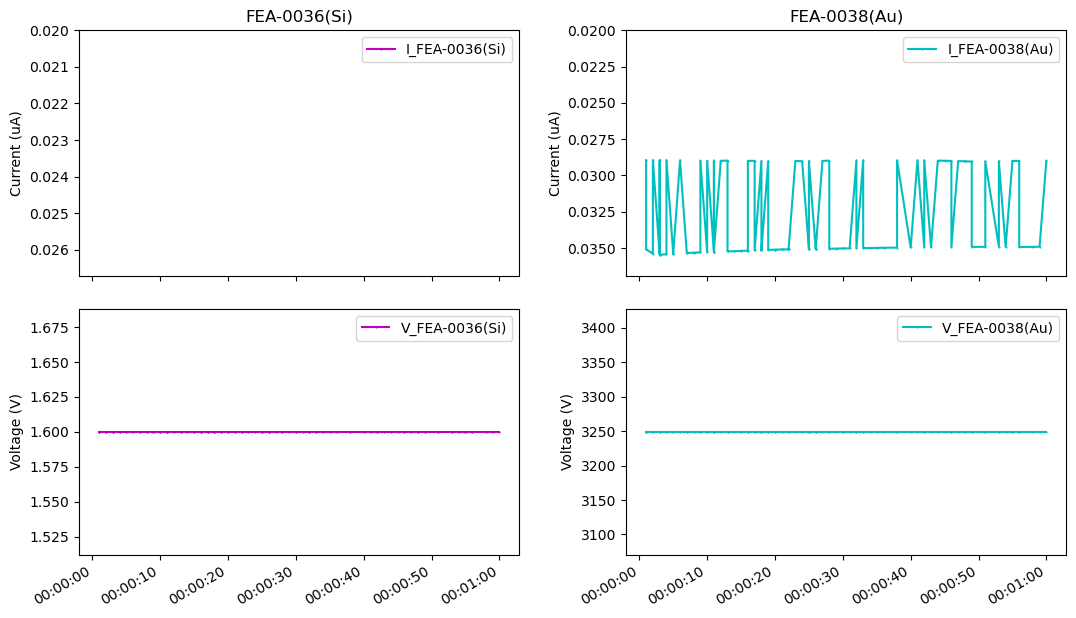

In [ ]:
#plt.subplots(2,1, sharex='col')

plt.figure(figsize = [11,7])

plt.subplot(2,2,1)
plt.title(f"{FEA1}")
plt.ylabel('Current (uA)')
plt.plot_date(df_0.date[0:], df_0.IMon[0:] - np.min(df.IMon[0:]),'.-', color='m',label="I_"+FEA1, markersize=1)
plt.ylim([np.min(df_0.IMon[0:] - np.min(df.IMon[0:]))+0.008,0.02])
plt.legend(loc='best')

plt.subplot(2,2,2)
plt.title(f"{FEA2}")
plt.ylabel('Current (uA)')
plt.plot_date(df_2.date[0:], df_2.IMon[0:] - np.min(df.IMon[0:]),'.-',color='c',label='I_'+FEA2, markersize=1)
plt.ylim([np.min(df_2.IMon[0:] - np.min(df.IMon[0:]))+0.008,0.02])
plt.legend(loc='best')

plt.subplot(2,2,3)
plt.ylabel('Voltage (V)')
plt.plot_date(df_0.date[0:], df_0.VMon[0:],'.-',color='m',label='V_'+FEA1, markersize=1)
#plt.yscale("log")
plt.legend(loc='best')

plt.subplot(2,2,4)
plt.ylabel('Voltage (V)')
plt.plot_date(df_2.date[0:], df_2.VMon[0:],'.-',color='c',label='V_'+FEA2, markersize=1)
#plt.yscale("log")
plt.legend(loc='best')

#plt.legend()
plt.tight_layout()
plt.gcf().autofmt_xdate()

# directory = '/home/caio/remote/graphs/FEA_0036-0038'
# filename = 'before_new-HVsupply'
# path = os.path.join(directory, filename)

# plt.savefig(path, dpi=200, transparent = True, bbox_inches='tight')

# plt.show()

In [ ]:
d1 = datetime(2024, 6, 6, 00, 13, 14)
d2 = datetime(2024, 6, 8, 23, 15, 29)
df_f = filter_date(df,d1,d2)

df_0 = df_f.query("channel==2")
df_2 = df_f.query("channel==3")

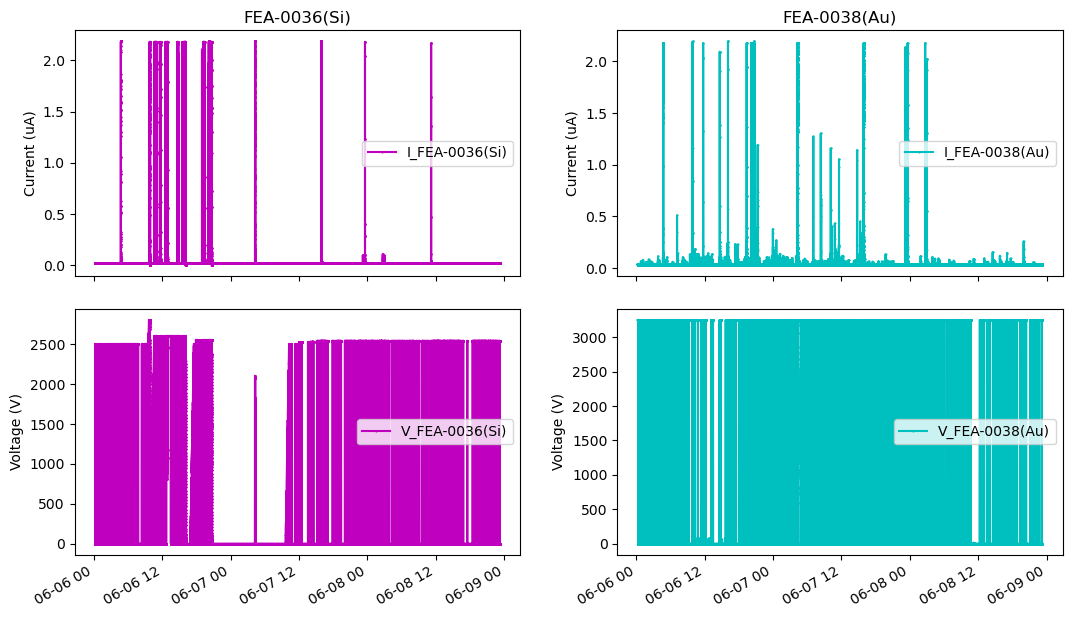

In [ ]:
#plt.subplots(2,1, sharex='col')

plt.figure(figsize = [11,7])

plt.subplot(2,2,1)
plt.title(f"{FEA1}")
plt.ylabel('Current (uA)')
plt.plot_date(df_0.date[0:], df_0.IMon[0:] - np.min(df.IMon[0:]),'.-', color='m',label="I_"+FEA1, markersize=1)
plt.legend(loc='best')

plt.subplot(2,2,2)
plt.title(f"{FEA2}")
plt.ylabel('Current (uA)')
plt.plot_date(df_2.date[0:], df_2.IMon[0:] - np.min(df.IMon[0:]),'.-',color='c',label='I_'+FEA2, markersize=1)
plt.legend(loc='best')

plt.subplot(2,2,3)
plt.ylabel('Voltage (V)')
plt.plot_date(df_0.date[0:], df_0.VMon[0:],'.-',color='m',label='V_'+FEA1, markersize=1)
#plt.yscale("log")
plt.legend(loc='best')

plt.subplot(2,2,4)
plt.ylabel('Voltage (V)')
plt.plot_date(df_2.date[0:], df_2.VMon[0:],'.-',color='c',label='V_'+FEA2, markersize=1)
#plt.yscale("log")
plt.legend(loc='best')

#plt.legend()
plt.tight_layout()
plt.gcf().autofmt_xdate()

# directory = '/home/caio/remote/graphs/FEA_0036-0038'
# filename = 'after_new-HV'
# path = os.path.join(directory, filename)

# plt.savefig(path, dpi=200, transparent = True)

# plt.show()


# 241119_4FEA_LXe

In [2]:
######################
# import pacakge
######################
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
#get_ipython().run_line_magic('matplotlib', 'ipympl')
#%matplotlib widget
import os
import FEA_analysis
import numpy as np
from datetime import timedelta


In [3]:
##########################
#importing folder folder
##########################

cols = ['timestamp','ch', 'VMON','IMON']
FEA_test_dir = '241119_4FEA_LXe'
FEA_data = 'beforeLXe' 


all_df_caen1, all_df_caen2, df_ctc = FEA_analysis.import_caen_data(FEA_test_dir, FEA_data, cols)

In [8]:
df_ctc

,timestamp,In1,In2,In3,In4,AIO1,AIO2,AIO3,AIO4
0,24/11/19-09:46:42,23.04874,23.05010,23.18091,23.11021,3.839076,-0.102004,-276.0845,0.000000
1,24/11/19-09:46:44,23.04876,23.04994,23.18088,23.11021,3.839038,-0.101999,-276.0867,0.000000
2,24/11/19-09:46:46,23.04887,23.04969,23.18090,23.11017,3.838951,-0.102004,-276.0870,0.000000
3,24/11/19-09:46:48,23.04891,23.04962,23.18113,23.11024,3.839021,-0.102002,-276.0894,0.000000
4,24/11/19-09:46:50,23.04859,23.04979,23.18123,23.11001,3.839069,-0.102003,-276.0875,0.000000
...,...,...,...,...,...,...,...,...,...
305312,24/11/26-11:34:51,-96.18031,-88.13098,-101.52160,-101.83980,0.007635,0.004916,-112.3718,-0.022372
305313,24/11/26-11:34:53,-96.18089,-88.13183,-101.52150,-101.84020,0.007635,0.004910,-112.6809,-0.022205
305314,24/11/26-11:34:55,-96.18134,-88.13230,-101.52180,-101.84030,0.007636,0.004911,-112.3562,-0.022310
305315,24/11/26-11:34:57,-96.18108,-88.13271,-101.52220,-101.84080,0.007635,0.004914,-112.6818,-0.022332


In [9]:
for i in range(0, len(df_ctc['AIO4'])):
        if df_ctc.loc[i, 'AIO4'] < 0:
              df_ctc.loc[i,'AIO4'] = 0

In [10]:
baselineForPressureGauge = df_ctc['AIO4'].loc[0:100]
print(baselineForPressureGauge)
print(np.mean(baselineForPressureGauge))

df_ctc['AIO4'] -= np.mean(baselineForPressureGauge)
df_ctc

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
96     0.0
97     0.0
98     0.0
99     0.0
100    0.0
Name: AIO4, Length: 101, dtype: float64
0.0


,timestamp,In1,In2,In3,In4,AIO1,AIO2,AIO3,AIO4
0,24/11/19-09:46:42,23.04874,23.05010,23.18091,23.11021,3.839076,-0.102004,-276.0845,0.0
1,24/11/19-09:46:44,23.04876,23.04994,23.18088,23.11021,3.839038,-0.101999,-276.0867,0.0
2,24/11/19-09:46:46,23.04887,23.04969,23.18090,23.11017,3.838951,-0.102004,-276.0870,0.0
3,24/11/19-09:46:48,23.04891,23.04962,23.18113,23.11024,3.839021,-0.102002,-276.0894,0.0
4,24/11/19-09:46:50,23.04859,23.04979,23.18123,23.11001,3.839069,-0.102003,-276.0875,0.0
...,...,...,...,...,...,...,...,...,...
305312,24/11/26-11:34:51,-96.18031,-88.13098,-101.52160,-101.83980,0.007635,0.004916,-112.3718,0.0
305313,24/11/26-11:34:53,-96.18089,-88.13183,-101.52150,-101.84020,0.007635,0.004910,-112.6809,0.0
305314,24/11/26-11:34:55,-96.18134,-88.13230,-101.52180,-101.84030,0.007636,0.004911,-112.3562,0.0
305315,24/11/26-11:34:57,-96.18108,-88.13271,-101.52220,-101.84080,0.007635,0.004914,-112.6818,0.0


In [63]:
y = df_ctc[df_ctc['AIO4'] > 0]
yy = y[y['AIO4'] < 1.01]
yyy = yy['AIO4']/30
x = yy['timestamp']
xx = []
for el in x:
    xx.append(datetime.strptime(el, '%y/%m/%d-%H:%M:%S'))



In [65]:
np.sum(yyy)/2.97

1.8421417669977551

In [60]:
print(xx[-1]-xx[0])
print(xx)

0:07:12
[datetime.datetime(2024, 11, 25, 16, 40, 33), datetime.datetime(2024, 11, 25, 16, 40, 35), datetime.datetime(2024, 11, 25, 16, 40, 39), datetime.datetime(2024, 11, 25, 16, 41, 23), datetime.datetime(2024, 11, 25, 16, 41, 25), datetime.datetime(2024, 11, 25, 16, 41, 27), datetime.datetime(2024, 11, 25, 16, 41, 29), datetime.datetime(2024, 11, 25, 16, 41, 31), datetime.datetime(2024, 11, 25, 16, 41, 33), datetime.datetime(2024, 11, 25, 16, 41, 35), datetime.datetime(2024, 11, 25, 16, 41, 37), datetime.datetime(2024, 11, 25, 16, 41, 39), datetime.datetime(2024, 11, 25, 16, 41, 41), datetime.datetime(2024, 11, 25, 16, 41, 43), datetime.datetime(2024, 11, 25, 16, 41, 45), datetime.datetime(2024, 11, 25, 16, 41, 47), datetime.datetime(2024, 11, 25, 16, 41, 49), datetime.datetime(2024, 11, 25, 16, 41, 51), datetime.datetime(2024, 11, 25, 16, 41, 53), datetime.datetime(2024, 11, 25, 16, 41, 55), datetime.datetime(2024, 11, 25, 16, 41, 57), datetime.datetime(2024, 11, 25, 16, 41, 59), d

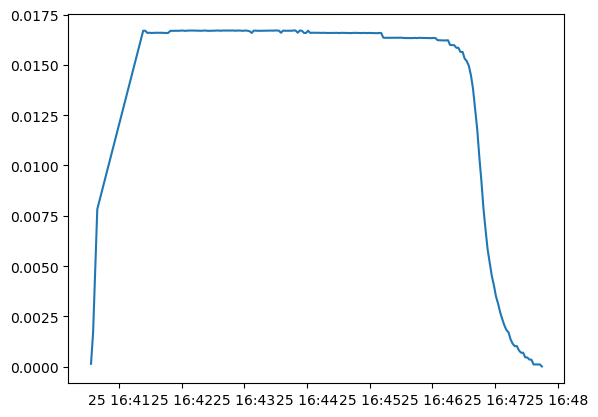

In [61]:
plt.plot(xx,yyy)